##Importing Libraries

In [ ]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 43.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681847 sha256=65a59b088580b1aeb1fb2e23054d909e1f338652a61f67f79600793ddcc5397f
  Stored in directory: /root/.cache/pip/wheels/47/15/92/e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
import plotly.express as px
import plotly.express as plt
import pycountry
from sklearn.linear_model import LinearRegression
import sklearn
import sklearn.metrics as sm
import math

##Handling the Data

In [ ]:
data = pd.read_csv("/content/Life Expectancy Data (1).csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


##The Independent variables indicate

1. Status: Is the Country Developing or already developed.
2. Adult Mortality Rate: Indicates probability of death between the age of 15 to 60 per 1000 (includes both gender).
3. Infant Death: Number of Infant Death.
4. Expenditure: Percentage of Expenditure on Healthcare wrt GDP
5. BMI: Average BMI of total population.
6. Total Expenditure: Percentage of expenditure on Healthcare by Government wrt other expenditure
7. Thinness (Age 1 to 19): Adoption of Thinness among childrens and Adults from age 1 to 19
8. Thinness (Age 5 to 9): Adoption of Thinness among childrens and Adults from age 5 to 9
9. Income Composition: Human Development Index based on the income composition of resources

In [ ]:
data.shape

(2938, 22)

In [ ]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
data[['Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Diphtheria ',
     'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Life expectancy ', 'Total expenditure', 
     'Income composition of resources', 'Schooling', 'GDP']] = data[['Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Diphtheria ',
     'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Life expectancy ', 'Total expenditure', 
     'Income composition of resources', 'Schooling', 'GDP']].transform(lambda x: x.fillna(x.mean()))

In [ ]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# **Detecting And Removing Outliers**

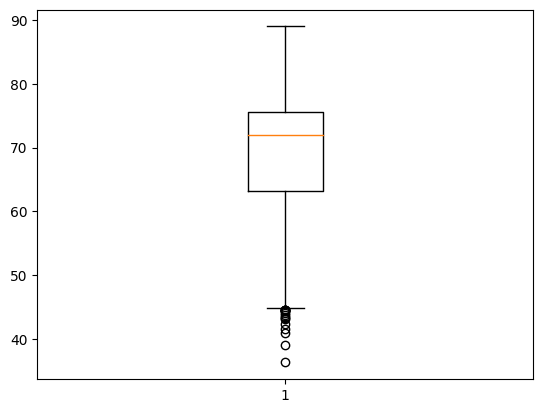

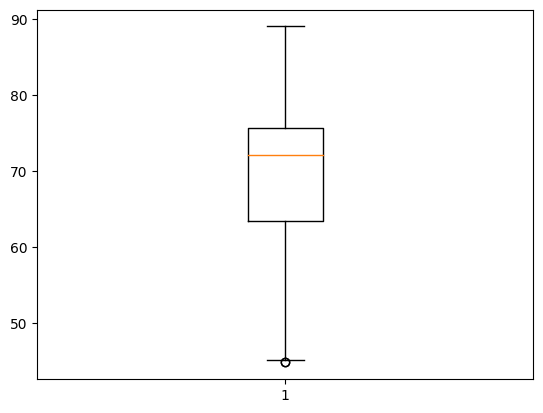

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.boxplot(data['Life expectancy '])
plt.show()

q1, q3 = np.percentile(data['Life expectancy '], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data['Life expectancy '][(data['Life expectancy '] < lower_bound) | (data['Life expectancy '] > upper_bound)]

# remove outliers from the data
data1 = data['Life expectancy '][(data['Life expectancy '] >= lower_bound) & (data['Life expectancy '] <= upper_bound)]
data['Life expectancy '] = data1
# plt.figure()
plt.boxplot(data1)
plt.show()

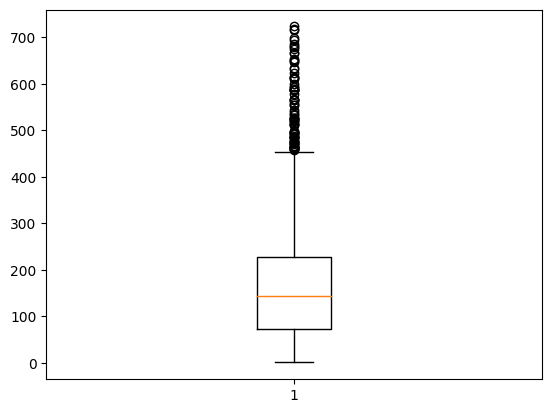

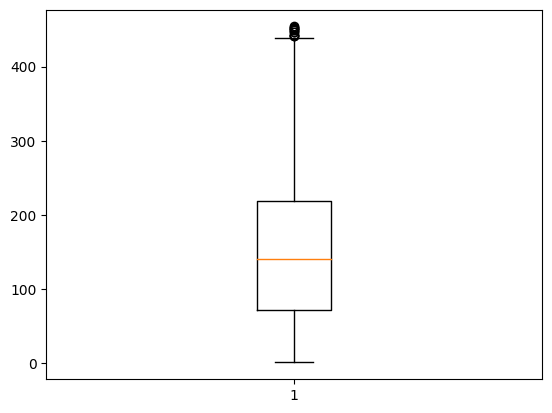

In [ ]:
plt.boxplot(data['Adult Mortality'])
plt.show()

q1, q3 = np.percentile(data['Adult Mortality'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data['Adult Mortality'][(data['Adult Mortality'] < lower_bound) | (data['Adult Mortality'] > upper_bound)]

# remove outliers from the data
data1 = data['Adult Mortality'][(data['Adult Mortality'] >= lower_bound) & (data['Adult Mortality'] <= upper_bound)]
data['Adult Mortality']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

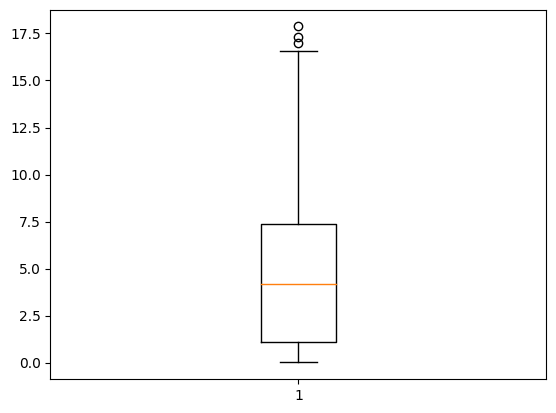

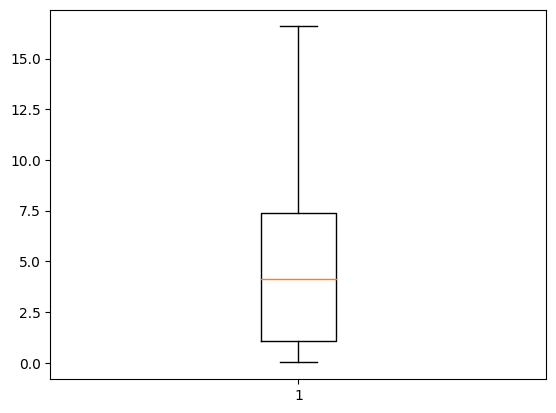

In [ ]:
plt.boxplot(data['Alcohol'])
plt.show()

q1, q3 = np.percentile(data['Alcohol'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data['Alcohol'][(data['Alcohol'] < lower_bound) | (data['Alcohol'] > upper_bound)]

# remove outliers from the data
data1 = data['Alcohol'][(data['Alcohol'] >= lower_bound) & (data['Alcohol'] <= upper_bound)]
data['Alcohol']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

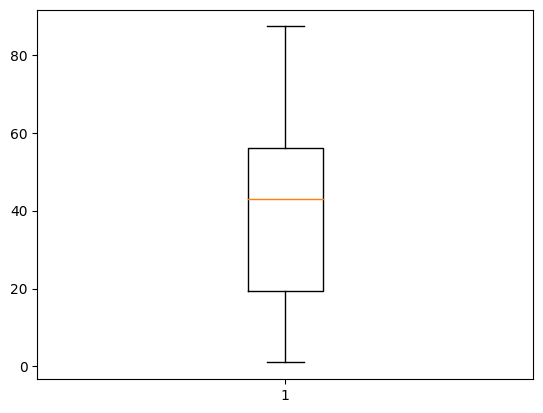

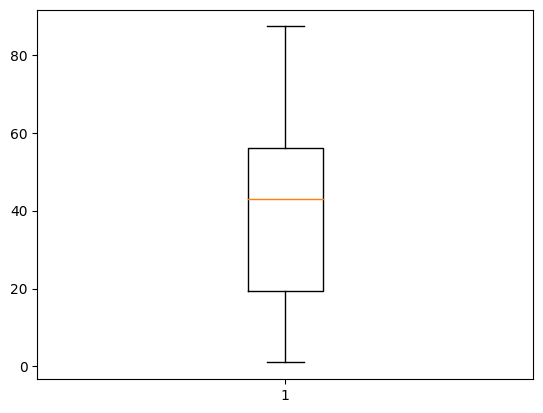

In [ ]:
plt.boxplot(data[' BMI '])
plt.show()

q1, q3 = np.percentile(data[' BMI '], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data[' BMI '][(data[' BMI '] < lower_bound) | (data[' BMI '] > upper_bound)]

# remove outliers from the data
data1 = data[' BMI '][(data[' BMI '] >= lower_bound) & (data[' BMI '] <= upper_bound)]
data[' BMI ']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

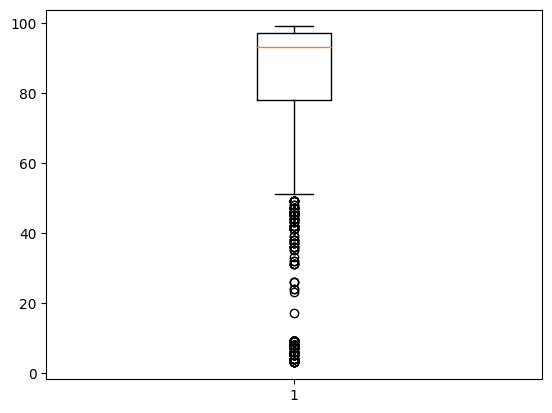

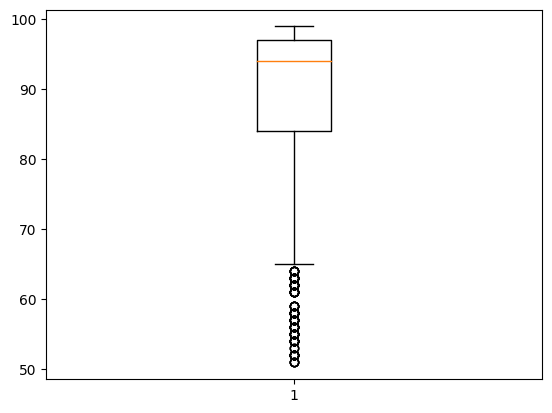

In [ ]:
plt.boxplot(data['Polio'])
plt.show()

q1, q3 = np.percentile(data['Polio'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data['Polio'][(data['Polio'] < lower_bound) | (data['Polio'] > upper_bound)]

# remove outliers from the data
data1 = data['Polio'][(data['Polio'] >= lower_bound) & (data['Polio'] <= upper_bound)]
data['Polio']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

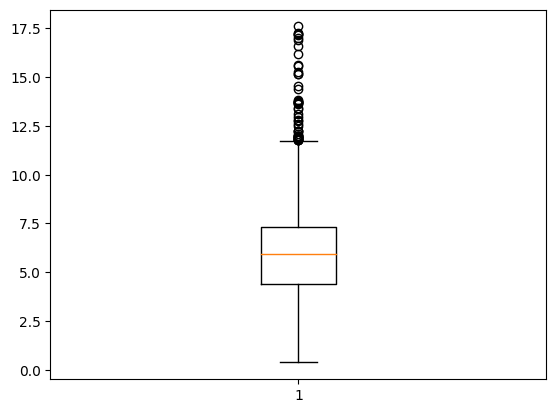

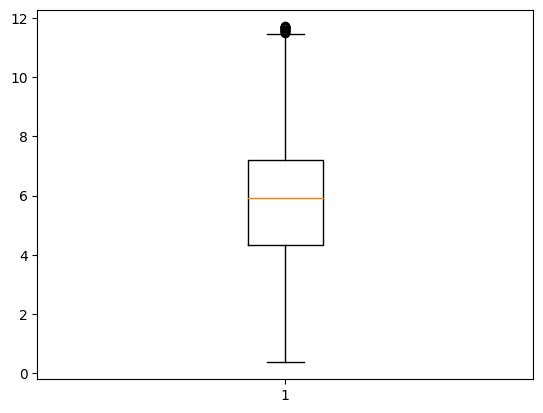

In [ ]:
plt.boxplot(data['Total expenditure'])
plt.show()

q1, q3 = np.percentile(data['Total expenditure'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data['Total expenditure'][(data['Total expenditure'] < lower_bound) | (data['Total expenditure'] > upper_bound)]

# remove outliers from the data
data1 = data['Total expenditure'][(data['Total expenditure'] >= lower_bound) & (data['Total expenditure'] <= upper_bound)]
data['Total expenditure']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

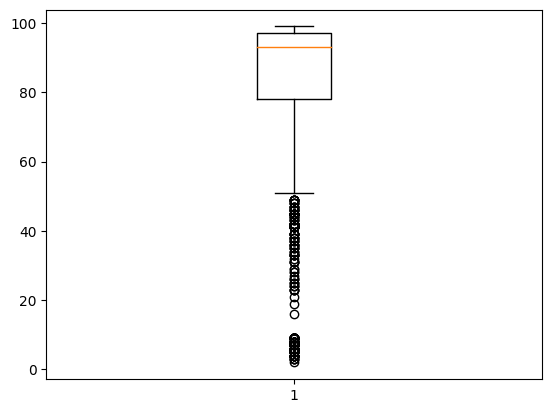

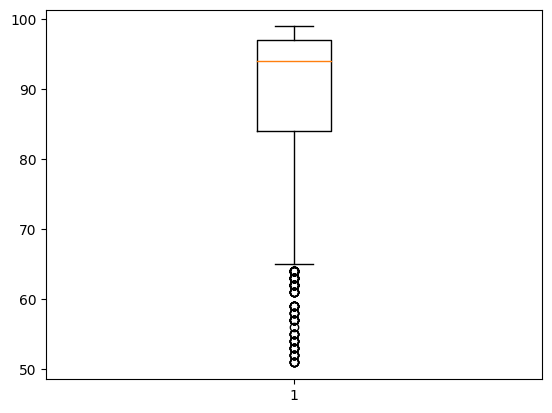

In [ ]:
plt.boxplot(data['Diphtheria '])
plt.show()

q1, q3 = np.percentile(data['Diphtheria '], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data['Diphtheria '][(data['Diphtheria '] < lower_bound) | (data['Diphtheria '] > upper_bound)]

# remove outliers from the data
data1 = data['Diphtheria '][(data['Diphtheria '] >= lower_bound) & (data['Diphtheria '] <= upper_bound)]
data['Diphtheria ']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

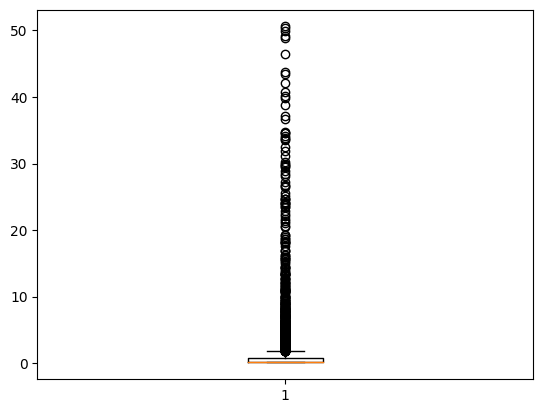

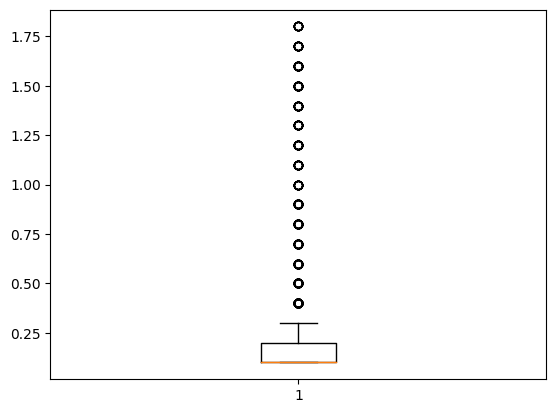

In [ ]:
plt.boxplot(data[' HIV/AIDS'])
plt.show()

q1, q3 = np.percentile(data[' HIV/AIDS'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data[' HIV/AIDS'][(data[' HIV/AIDS'] < lower_bound) | (data[' HIV/AIDS'] > upper_bound)]

# remove outliers from the data
data1 = data[' HIV/AIDS'][(data[' HIV/AIDS'] >= lower_bound) & (data[' HIV/AIDS'] <= upper_bound)]
data[' HIV/AIDS']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

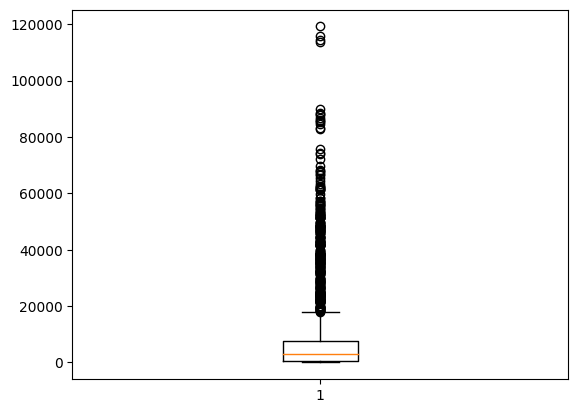

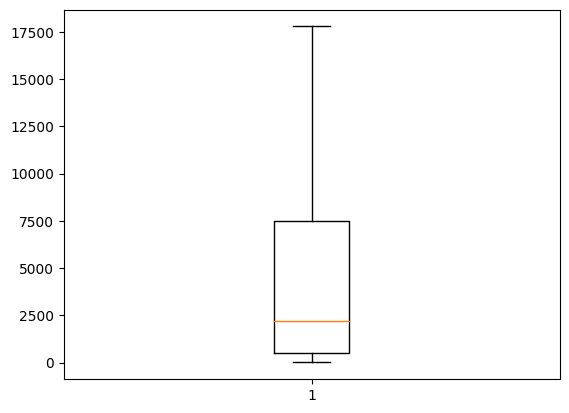

In [ ]:
plt.boxplot(data['GDP'])
plt.show()

q1, q3 = np.percentile(data['GDP'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data['GDP'][(data['GDP'] < lower_bound) | (data['GDP'] > upper_bound)]

# remove outliers from the data
data1 = data['GDP'][(data['GDP'] >= lower_bound) & (data['GDP'] <= upper_bound)]
data['GDP']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

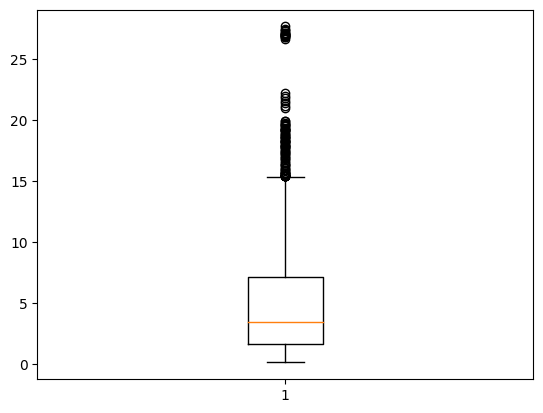

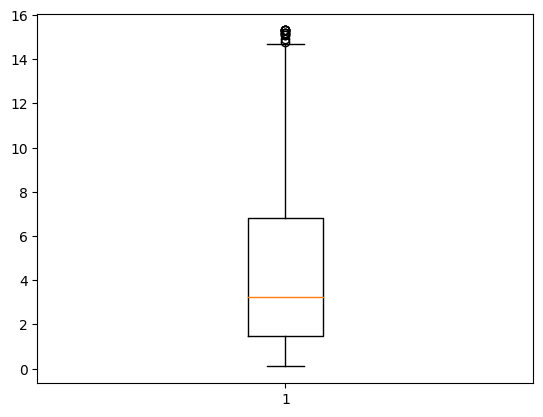

In [ ]:
plt.boxplot(data[' thinness  1-19 years'])
plt.show()

q1, q3 = np.percentile(data[' thinness  1-19 years'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data[' thinness  1-19 years'][(data[' thinness  1-19 years'] < lower_bound) | (data[' thinness  1-19 years'] > upper_bound)]

# remove outliers from the data
data1 = data[' thinness  1-19 years'][(data[' thinness  1-19 years'] >= lower_bound) & (data[' thinness  1-19 years'] <= upper_bound)]
data[' thinness  1-19 years']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

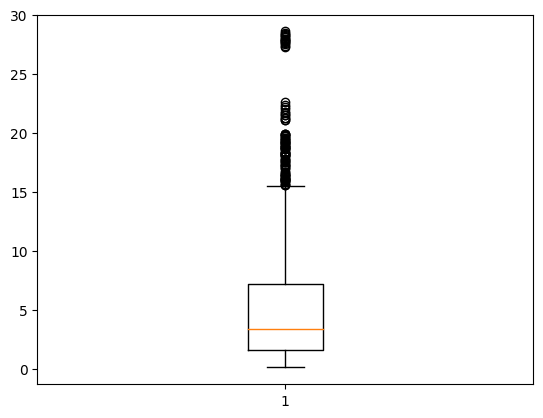

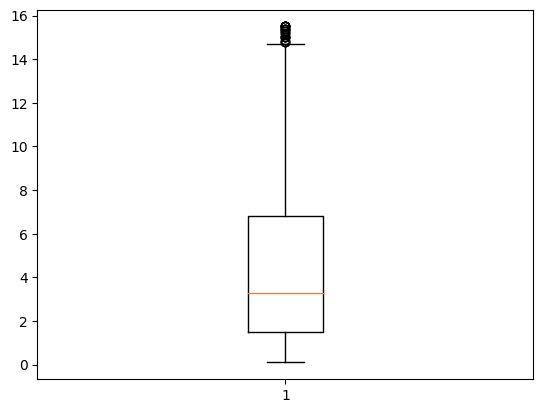

In [ ]:
plt.boxplot(data[' thinness 5-9 years'])
plt.show()

q1, q3 = np.percentile(data[' thinness 5-9 years'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data[' thinness 5-9 years'][(data[' thinness 5-9 years'] < lower_bound) | (data[' thinness 5-9 years'] > upper_bound)]

# remove outliers from the data
data1 = data[' thinness 5-9 years'][(data[' thinness 5-9 years'] >= lower_bound) & (data[' thinness 5-9 years'] <= upper_bound)]
data[' thinness 5-9 years']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

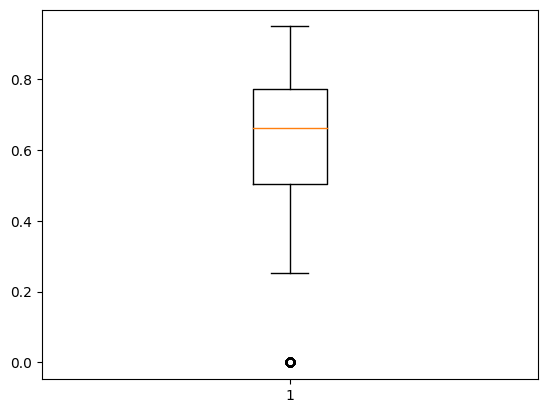

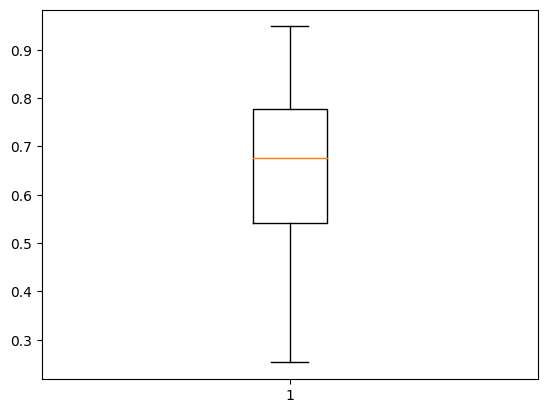

In [ ]:
plt.boxplot(data['Income composition of resources'])
plt.show()

q1, q3 = np.percentile(data['Income composition of resources'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data['Income composition of resources'][(data['Income composition of resources'] < lower_bound) | (data['Income composition of resources'] > upper_bound)]

# remove outliers from the data
data1 = data['Income composition of resources'][(data['Income composition of resources'] >= lower_bound) & (data['Income composition of resources'] <= upper_bound)]
data['Income composition of resources']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

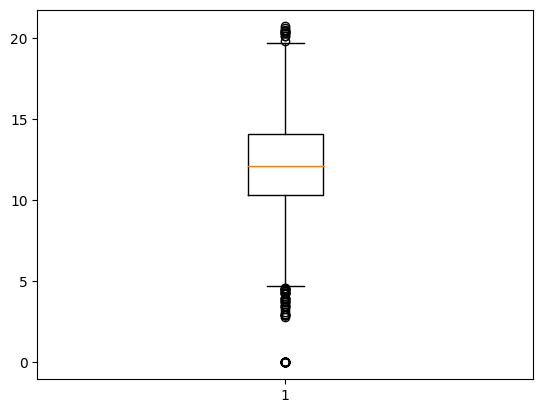

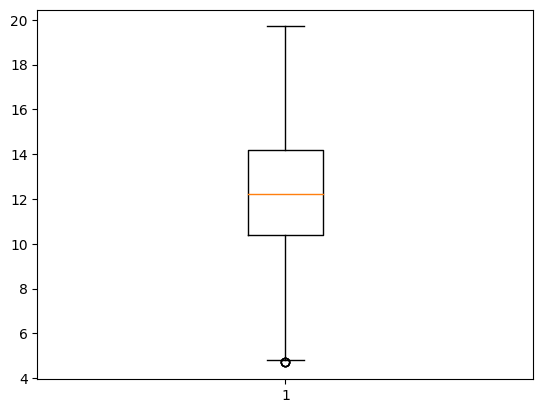

In [ ]:
plt.boxplot(data['Schooling'])
plt.show()

q1, q3 = np.percentile(data['Schooling'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
outliers = data['Schooling'][(data['Schooling'] < lower_bound) | (data['Schooling'] > upper_bound)]

# remove outliers from the data
data1 = data['Schooling'][(data['Schooling'] >= lower_bound) & (data['Schooling'] <= upper_bound)]
data['Schooling']= data1
# plt.figure()
plt.boxplot(data1)
plt.show()

Box plots were used to detect ouliers for each variable

In [ ]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,NaN,8.16,65.0,0.1,584.259210,33736494.0,NaN,NaN,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,NaN,NaN,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,NaN,NaN,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,NaN,NaN,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,NaN,NaN,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,NaN,NaN,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,NaN,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,NaN,NaN,26,4.06,0.000000,7.0,998,...,NaN,6.52,68.0,NaN,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,NaN,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,NaN,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,NaN,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2921 non-null   float64
 4   Adult Mortality                  2852 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2935 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
data[['Life expectancy ','Adult Mortality','Alcohol','percentage expenditure','Polio','Total expenditure','Diphtheria ',
     ' HIV/AIDS','GDP',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling']]= data[['Life expectancy ','Adult Mortality','Alcohol','percentage expenditure','Polio','Total expenditure','Diphtheria ',
     ' HIV/AIDS','GDP',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling']].transform(lambda x: x.fillna(x.mean()))

Null values were removed with mean values for each Country

In [ ]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

# **Performing Exploratory Data Analysis on cleaned data**

# **1) Pair Plot**

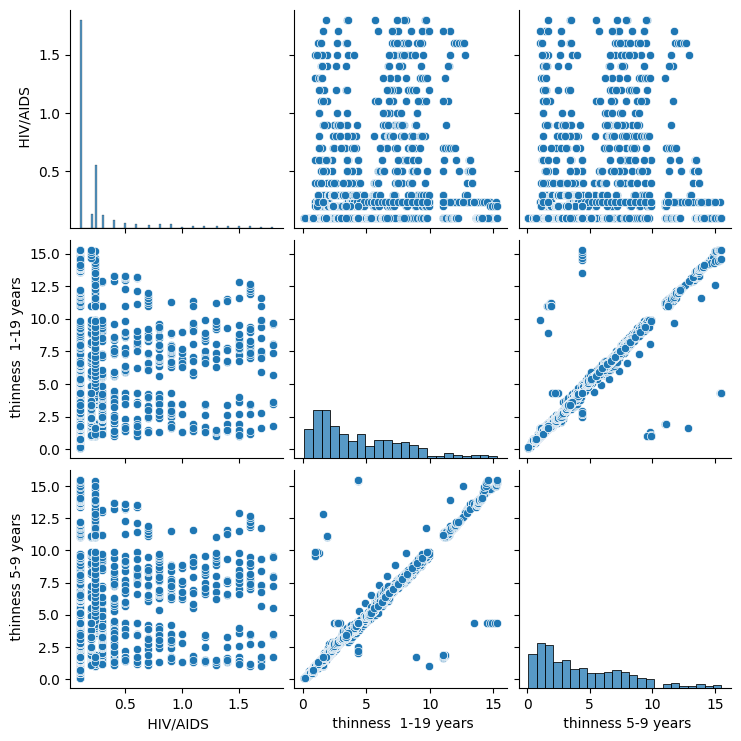

In [ ]:
sns.pairplot(data[[' HIV/AIDS',' thinness  1-19 years',' thinness 5-9 years']])

From the above pairplot, we can see that people do get thin with an HIV/ AIDS disease

Moreover thinness for age group 5-9 have a positive correlation with thinness for age group 1-19 

# **2) Bar Plot**

<Axes: title={'center': 'Average Life Expectancy'}, xlabel='Status', ylabel='Life Expectancy'>

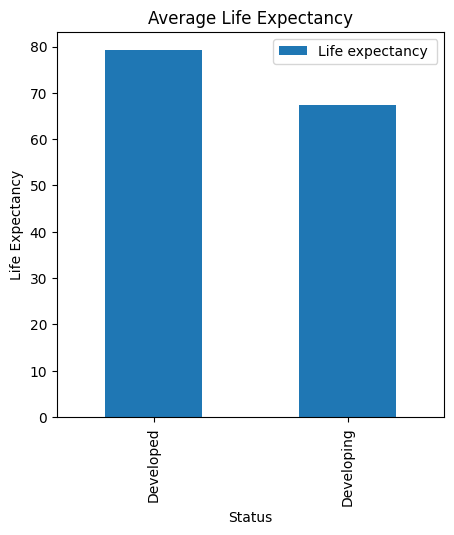

In [ ]:
import plotly.express as plt
data_1 = data.groupby(['Status'])[['Life expectancy ']].mean()
data_1.plot(kind='bar', title='Average Life Expectancy', ylabel='Life Expectancy', xlabel='Status', figsize=(5, 5))

Average Life Expectancy for Developed Country is greater than Country which is still Developing

# **3) Bubble Chart**

In [ ]:
px.scatter(data,x='Life expectancy ',y='percentage expenditure',color='Country',size='Year',title='Life Expectancy VS Percentage Expenditure', width = None, height = None)

We can see from the above graph that as the age increases, percentage expenditure for Health Sector increases. We can also depict that higher life expectancy leads to higher expenditure on healthcare

# **4) Animeted Bubble Chart**

In [ ]:
grouped = data.groupby('Country')
px.scatter(data.sort_values(by='Year'),y='Schooling',x='Life expectancy ',animation_frame='Year',animation_group='Country',color='Country',size='Life expectancy ',title='Life expectancy VS Schooling of countries in every year', height = None, width = None)

As the years pass on we can see that Life expectany for each and every country has increased as the number of years for Schooling has increased.

# **5) Choropleth Map Chart**

In [ ]:
def get_country_code(country_name):
    try:
        country_code = pycountry.countries.search_fuzzy(country_name)[0].alpha_3
    except LookupError:
        # Handle the case where the country name is not found
        country_code = None
    return country_code
data['Country Code'] = data['Country'].apply(get_country_code)

we used pycountry library to get country code from country code and for that we created a custom function which convert country name into 3 letter country code and if country name is not defined then it shows None in country code.

In [ ]:
import plotly.express as px
px.choropleth(data,               
              locations='Country Code',               
              color="Life expectancy ",
              hover_name="Country",  
              animation_frame="Year",    
              color_continuous_scale='Plasma',  
              height=600             
)

The lowest Life Expectancy we can see is in the African region from the year 2000 to 2015

In [ ]:
data_1 = data.iloc[:,3:-1]
data_1

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.000000,263.000000,62,0.01,71.279624,65.0,1154,19.1,83,89.044172,8.16,65.0,0.100000,584.259210,33736494.0,4.330215,4.344872,0.479,10.1
1,59.900000,271.000000,64,0.01,73.523582,62.0,492,18.6,86,58.000000,8.18,62.0,0.100000,612.696514,327582.0,4.330215,4.344872,0.476,10.0
2,59.900000,268.000000,66,0.01,73.219243,64.0,430,18.1,89,62.000000,8.13,64.0,0.100000,631.744976,31731688.0,4.330215,4.344872,0.470,9.9
3,59.500000,272.000000,69,0.01,78.184215,67.0,2787,17.6,93,67.000000,8.52,67.0,0.100000,669.959000,3696958.0,4.330215,4.344872,0.463,9.8
4,59.200000,275.000000,71,0.01,7.097109,68.0,3013,17.2,97,68.000000,7.87,68.0,0.100000,63.537231,2978599.0,4.330215,4.344872,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,69.378175,153.144448,27,4.36,0.000000,68.0,31,27.1,42,67.000000,7.13,65.0,0.239023,454.366654,12777511.0,9.400000,9.400000,0.407,9.2
2934,69.378175,153.144448,26,4.06,0.000000,7.0,998,26.7,41,89.044172,6.52,68.0,0.239023,453.351155,12633897.0,9.800000,9.900000,0.418,9.5
2935,44.800000,73.000000,25,4.43,0.000000,73.0,304,26.3,40,73.000000,6.53,71.0,0.239023,57.348340,125525.0,1.200000,1.300000,0.427,10.0
2936,45.300000,153.144448,25,1.72,0.000000,76.0,529,25.9,39,76.000000,6.16,75.0,0.239023,548.587312,12366165.0,1.600000,1.700000,0.427,9.8


# **6) Heat map for finding co-relation between columns**

> Indented block



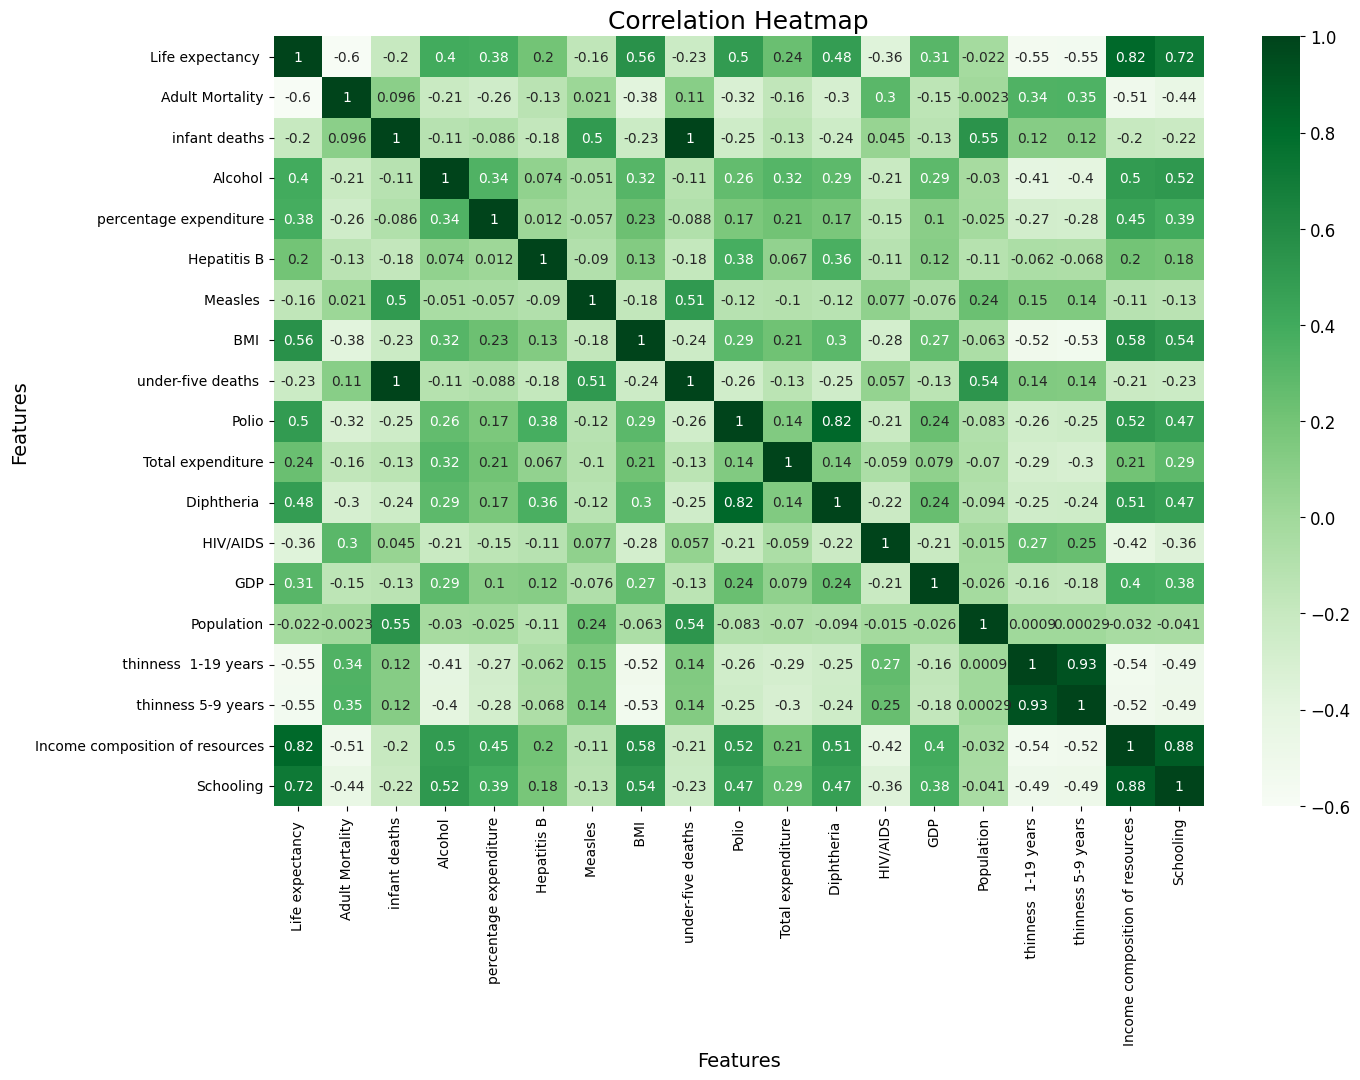

In [ ]:
import matplotlib.pyplot as plt

plt.ion()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data_1.corr(), annot=True, cmap='Greens', ax=ax)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

ax.set_title('Correlation Heatmap', fontsize=18)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Features', fontsize=14)

plt.show()

In [ ]:
X = data.iloc[:, 4:-1].values

# **Performing PCA (Pricipal Componant Analysis)**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X_Scaled = sc.transform(X)
X_Scaled

array([[ 1.06116523e+00,  2.68823775e-01, -1.17605314e+00, ...,
         2.60133974e-16, -1.15355659e+00, -7.28139667e-01],
       [ 1.13844236e+00,  2.85786378e-01, -1.17605314e+00, ...,
         2.60133974e-16, -1.17304186e+00, -7.63229847e-01],
       [ 1.10946343e+00,  3.02748982e-01, -1.17605314e+00, ...,
         2.60133974e-16, -1.21201242e+00, -7.98320028e-01],
       ...,
       [-7.74166613e-01, -4.49843850e-02, -4.10328969e-02, ...,
        -8.91796693e-01, -1.49130136e+00, -7.63229847e-01],
       [ 2.74543517e-16, -4.49843850e-02, -7.36938974e-01, ...,
        -7.74642766e-01, -1.49130136e+00, -8.33410208e-01],
       [ 2.74543517e-16, -5.34656867e-02, -7.47210651e-01, ...,
         2.00776300e+00, -1.44583572e+00, -8.33410208e-01]])

In [ ]:
cov_m = np.cov(X_Scaled.T)
cov_m.shape

(18, 18)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_m)

In [ ]:
eigenvectors = eigenvectors.T

In [ ]:
eigenvectors[0, :]

array([-0.23272458, -0.1832139 ,  0.24788545,  0.19012815,  0.13002504,
       -0.12405638,  0.28752372, -0.18965421,  0.26774537,  0.15968217,
        0.26756562, -0.18588517,  0.17952095, -0.07798904, -0.29138565,
       -0.29014397,  0.36275007,  0.34845875])

In [ ]:
eigenvalues = np.cumsum(eigenvalues)
eigenvalues /= eigenvalues.max()
eigenvalues

array([0.3135822 , 0.45521922, 0.54430002, 0.54445983, 0.5483529 ,
       0.55421663, 0.56392982, 0.6214206 , 0.67924296, 0.72954981,
       0.75254721, 0.77889931, 0.8079093 , 0.83797971, 0.88146071,
       0.92326563, 0.96115533, 1.        ])

In [ ]:
p = eigenvectors[0:16, :]
p.shape


(16, 18)

In [ ]:
data_new = np.dot(p, X_Scaled.T)
data_new.shape

(16, 2938)

In [ ]:
data_new = data_new.T
data_new.shape

(2938, 16)

In [ ]:
df_new = pd.DataFrame(data_new, columns = ['PC1', 'PC2', 'PC3',
                                           'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12',
                                           'PC13','PC14','PC15','PC16'])
df_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-2.286370,-0.042731,1.497801,0.003997,0.026895,0.289128,1.626194,-0.182391,0.519087,0.044363,0.654123,-0.676471,-0.604136,0.465998,-1.113292,0.725337
1,-3.149143,0.055790,3.086355,-0.013248,0.012212,0.023551,-0.196758,0.290839,-0.144349,0.037064,0.982326,-0.321049,-0.488224,0.272986,-1.770419,0.196903
2,-3.066671,-0.158423,2.725854,-0.004957,0.014437,0.057468,-0.084211,0.232555,0.050770,0.106609,0.859776,-0.620784,-0.379629,0.263958,-1.633080,0.552045
3,-2.854098,0.028090,2.373976,-0.011087,0.019984,0.095401,0.049221,-0.094097,0.162096,0.079176,0.798177,-0.428948,-0.606399,0.452000,-1.684890,0.218877
4,-2.962126,0.060434,2.220303,-0.006117,0.012925,0.097953,0.050805,-0.003515,0.318902,-0.022304,0.711807,-0.393570,-0.540215,0.398402,-1.507658,0.218670


Upper table is final result of PCA

In [ ]:
X = df_new
y = data['Life expectancy ']

# **Models Implementation**

##Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3  ,random_state= 42)


In [ ]:
lrregressor = LinearRegression()
lrregressor.fit(X_train, y_train)
y_pred = lrregressor.predict(X_test)
lr_mse = sm.mean_squared_error(y_test, y_pred)
lr_rmse = math.sqrt(lr_mse)
lr_r2 = sm.r2_score(y_test, y_pred)
print("Root Mean squared error =", lr_mse)
print("R2 Score =", lr_r2)

Root Mean squared error = 22.532641820086546
R2 Score = 0.7438917782587633


##Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtregressor = DecisionTreeRegressor(random_state = 0)
dtregressor.fit(X_train, y_train)

y_pred = dtregressor.predict(X_test)

dt_mse = sm.mean_squared_error(y_test, y_pred)
dt_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", dt_mse)
print("R2 Score =", dt_r2)

Mean squared error = 26.42820246921893
R2 Score = 0.6996144530121047


##Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfregressor.fit(X_train, y_train)

y_pred = rfregressor.predict(X_test)

rf_mse = sm.mean_squared_error(y_test, y_pred)
rf_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", rf_mse)
print("R2 Score =", rf_r2)

Mean squared error = 13.59390265815277
R2 Score = 0.8454903661940159


##Support Vector Regression

In [ ]:
from sklearn.svm import SVR
svregressor = SVR(kernel = 'rbf')
svregressor.fit(X_train, y_train)

y_pred = svregressor.predict(X_test)

sv_mse = sm.mean_squared_error(y_test, y_pred)
sv_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", sv_mse)
print("R2 Score =", sv_r2)

Mean squared error = 18.898868598242327
R2 Score = 0.7851936018748399


##Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

lasso_mse = sm.mean_squared_error(y_test, y_pred)
lasso_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", lasso_mse)
print("R2 Score =", lasso_r2)

Mean squared error = 28.55927189413672
R2 Score = 0.6753925084580364


##Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

ridge_mse = sm.mean_squared_error(y_test, y_pred)
ridge_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", ridge_mse)
print("R2 Score =", ridge_r2)

Mean squared error = 22.654066490121725
R2 Score = 0.7425116535238774


##Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train, y_train)

y_pred = en.predict(X_test)

en_mse = sm.mean_squared_error(y_test, y_pred)
en_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", en_mse)
print("R2 Score =", en_r2)

Mean squared error = 27.807850756180716
R2 Score = 0.6839332349719216


##K Neighbour Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
kn.fit(X_train, y_train)

y_pred = kn.predict(X_test)

kn_mse = sm.mean_squared_error(y_test, y_pred)
kn_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", kn_mse)
print("R2 Score =", kn_r2)

Mean squared error = 13.523581474406715
R2 Score = 0.8462896436805947


##Gradient Boosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

gb_mse = sm.mean_squared_error(y_test, y_pred)
gb_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", gb_mse)
print("R2 Score =", gb_r2)

Mean squared error = 14.168687474109035
R2 Score = 0.838957305478197


##ADA Boosting Regression

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(X_train, y_train)

y_pred = ab.predict(X_test)

ab_mse = sm.mean_squared_error(y_test, y_pred)
ab_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", ab_mse)
print("R2 Score =", ab_r2)

Mean squared error = 20.202892281146614
R2 Score = 0.7703719405177878


##Extra Tree Regression

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(X_train, y_train)

y_pred = et.predict(X_test)

et_mse = sm.mean_squared_error(y_test, y_pred)
et_r2 = sm.r2_score(y_test, y_pred)
print("Mean squared error =", et_mse)
print("R2 Score =", et_r2)

Mean squared error = 9.806698816327799
R2 Score = 0.8885360973180393


In [ ]:
y_ax=['Linear Regression' ,'Decision Tree Regression', 'Random Forest Regression','Support Vector Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression', 'K Neighbors Regression', 'Gradient Boosting Regression', 'Ada Boost Regression', 'Extra Trees Regression']
mse = [lr_mse, dt_mse, rf_mse, sv_mse, lasso_mse, ridge_mse, en_mse, kn_mse, gb_mse, ab_mse, et_mse]
x_ax = mse

<Axes: title={'center': 'MSE values comparison among different regression models'}, xlabel='MSE Values', ylabel='Algorithms'>

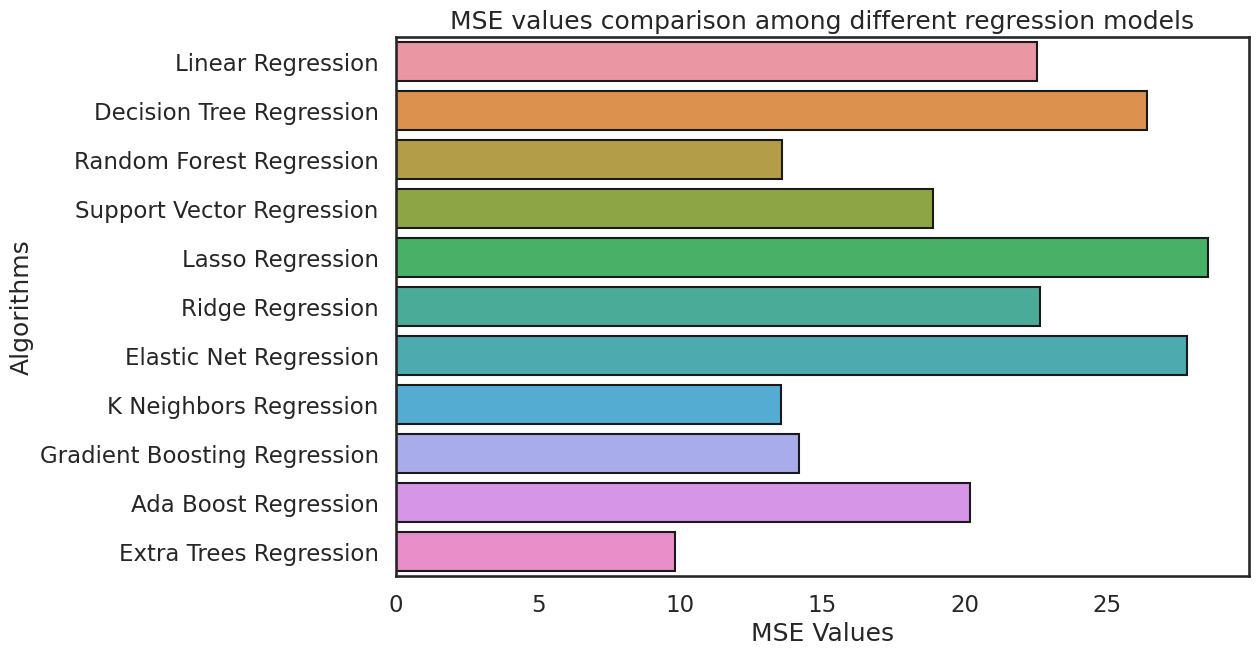

In [ ]:
sns.set(rc={'figure.figsize':(11,7)})

sns.set_style("white")

sns.set_context("talk")
pt.xlabel("MSE Values")
pt.ylabel("Algorithms")
pt.title('MSE values comparison among different regression models')

sns.barplot(x = x_ax, y = y_ax, linewidth = 1.5, edgecolor = "0.1")

In [ ]:
y_ax=['Linear Regression' ,'Decision Tree Regression', 'Random Forest Regression','Support Vector Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression', 'K Neighbors Regression', 'Gradient Boosting Regression', 'Ada Boost Regression', 'Extra Trees Regression']
r2 = [lr_r2, dt_r2, rf_r2, sv_r2, lasso_r2, ridge_r2, en_r2, kn_r2, gb_r2, ab_r2, et_r2]
x_ax = r2

<Axes: title={'center': 'R2 Scores comparison among different regression models'}, xlabel='R2 Scores', ylabel='Algorithms'>

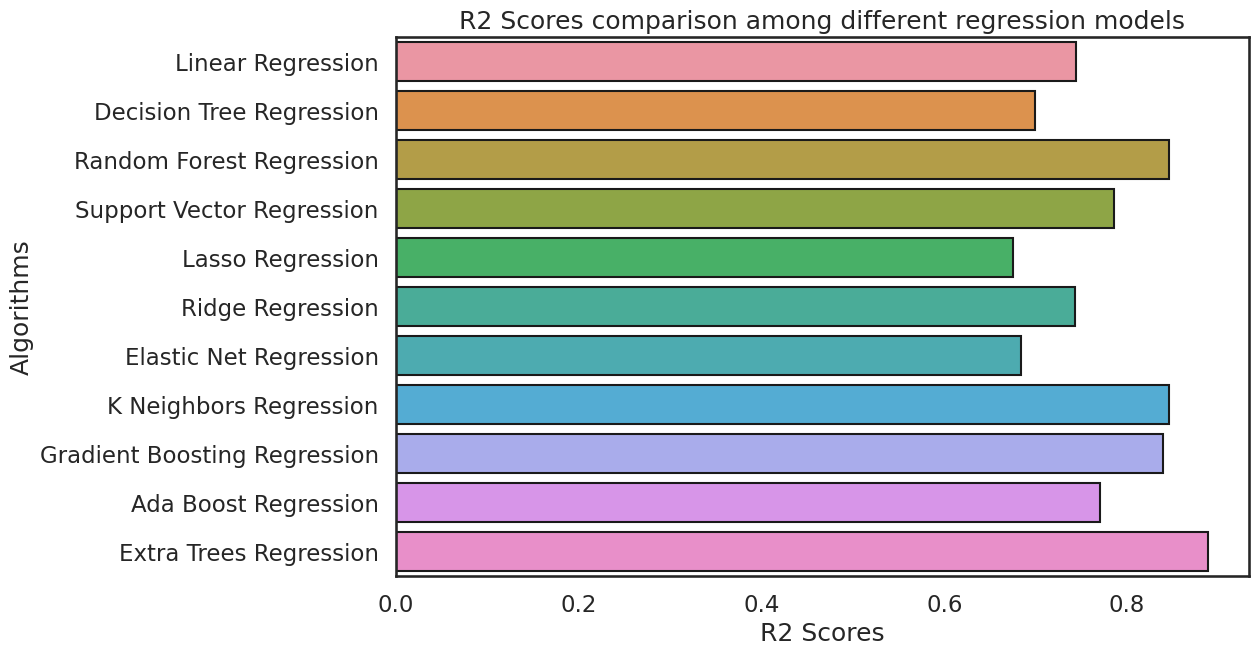

In [ ]:
sns.set(rc={'figure.figsize':(11,7)})

sns.set_style("white")

sns.set_context("talk")
pt.xlabel("R2 Scores")
pt.ylabel("Algorithms")
pt.title('R2 Scores comparison among different regression models')

sns.barplot(x = x_ax, y = y_ax, linewidth = 1.5, edgecolor = "0.1")

# **Models Evaluations**

In [ ]:
df = pd.DataFrame({'Algorithms': y_ax, 'MSE Values': mse, 'R2 Values':r2})
df

,Algorithms,MSE Values,R2 Values
0,Linear Regression,22.532642,0.743892
1,Decision Tree Regression,26.428202,0.699614
2,Random Forest Regression,13.593903,0.845490
3,Support Vector Regression,18.898869,0.785194
4,Lasso Regression,28.559272,0.675393
5,Ridge Regression,22.654066,0.742512
6,Elastic Net Regression,27.807851,0.683933
7,K Neighbors Regression,13.523581,0.846290
8,Gradient Boosting Regression,14.168687,0.838957
9,Ada Boost Regression,20.202892,0.770372


We can see from upper table Extra Trees Regression give highest R2 score and lowest MSE value. So, we can take this Algorithm for prediction tasks.: